# PRAKTIKUM 7B
__Interpolasi__

*Topik*
1. Interpolasi menggunakan SPL
2. Interpolasi Lagrange
3. Interpolasi Newton

<hr style="border:2px solid black"> </hr>

Pada subbab sebelumnya, telah dipelajari bahwa deret Taylor dapat digunakan untuk menghampiri fungsi $ f(x) $. Informasi yang dibutuhkan untuk menyusun fungsi hampiran polinomial Taylor adalah nilai dari $ f $ dan turunannya pada $ x_0 $. Kekurangan metode ini adalah turunan ordo-tinggi harus diketahui. Namun, sering kali turunan tersebut tak terdefinisi ataupun sulit untuk dihitung. Dengan demikian, diperlukan metode lain untuk menghampiri fungsi $ f(x) $ dengan fungsi polinomial tanpa perlu menggunakan turunan.


Misalkan, diketahui fungsi $ y=f(x) $ dengan $ N+1 $ titik, yaitu $ (x_0,y_0),\dots,(x_N,y_N) $, dimana nilai $ x_k $ menyebar pada interval $ [a,b] $ dan memenuhi
\begin{align*}
\begin{array}{ccc}
a\le x_0<x_1<\dots<x_N\le b & \text{dan} & y_k=f(x_k)
\end{array}
\end{align*}
Fungsi polinomial $ P(x) $ dengan derajat $ N $ dapat disusun melewati $ N+1 $ titik tersebut. Metode ini hanya memerlukan nilai numerik dari $ x_k $ dan $ y_k $. Oleh karena itu, turunan fungsi ordo-tinggi tidak lagi diperlukan. Fungsi polinomial $ P(x) $ dapat digunakan untuk menghampiri fungsi $ f(x) $ pada interval $ [a,b] $.

Pada sudut pandang lain, jika fungsi $ f(x) $ hanya diketahui berupa pasangan titik terurut $ (x_k,y_k) $, maka diperlukan metode selain deret Taylor untuk menghampiri fungsi $ f(x) $ berupa persamaan garis. Jika terdapat galat yang signifikan pada data titik terurut, maka metode yang digunakan untuk memperoleh fungsi hampiran adalah percocokan kurva yang akan dibahas pada Bab 8. Sebaliknya, jika diketahui titik $ (x_k,y_k) $ memiliki akurasi yang tinggi, maka fungsi polinomial $ y=P(x) $ harus melewati semua titik yang diketahui. Jika nilai $ x_0\le x\le x_N $ maka hampiran $ P(x) $ disebut sebagai nilai \textbf{interpolasi}. Sementara itu, jika nilai $ x\le x_0 $ atau $ x>x_N $ maka hampiran $ P(x) $ disebut sebagai nilai \textbf{ekstrapolasi}. Hampiran polinomial digunakan untuk merancang algoritma \textit{software} sebagai hampiran suatu fungsi, untuk turunan dan integral numerik, dan membuat kurva yang melewati beberapa titik. Metode paling dasar yang dapat digunakan untuk membentuk persamaan garis interpolasi adalah menggunakan sistem persamaan linear.

# 1 Interpolasi Linear

### Contoh 1
Carilah koefisien polinomial $ P(x)=A+Bx+Cx^2+Dx^3 $ yang melewati empat titik, yaitu $ (1,1.06) $, $ (2,1.12) $, $ (3,1.34) $, dan $ (5,1.78) $. Gunakan hampiran polinomial yang diperoleh untuk menghitung $ P(4) $ dan $ P(5.5) $.

In [ ]:
using Plots

In [ ]:
xk = [1, 2, 3, 5]
yk = [1.06, 1.12, 1.34, 1.78]
scatter(xk,yk,legend = :false)

Akan dicari nilai A, B, C, dan D. polinomial $ P(x)=A+Bx+Cx^2+Dx^3 $

Berdasarkan titik-titik yang diketahui, didapatkan persamaan linear untuk setiap $ x=1,2,3,5 $ seperti berikut.
\begin{align*}
\begin{array}{lllrlrlrl}
\text{Ketika } x=1 :& A&+&1B&+&1C &+&1D 	&= 1.06\\
\text{Ketika } x=2 :& A&+&2B&+&4C &+&8D 	&= 1.12\\
\text{Ketika } x=3 :& A&+&3B&+&9C &+&27D 	&= 1.34\\
\text{Ketika } x=5 :& A&+&5B&+&25C&+&125D 	&= 1.78\\
\end{array}
\end{align*}

In [ ]:
A = [1 1 1 1
     1 2 4 8
     1 3 9 27
     1 5 25 125];
B = [1.06; 1.12; 1.34; 1.78];
C = A\B

In [ ]:
x = 1:0.1:5
f(x) = C[1]+C[2]*x+C[3]*x^2+C[4]*x^3
plot!(x,f.(x))

In [ ]:
f(4),f(5.5)

Jadi, fungsi polinomial yang melewati keempat titik yang diberikan adalah $$ P(x)=1.28-0.4x+0.2x^2-0.02x^3 $$

# 2 Interpolasi Lagrange
Berikut merupakan bentuk umum interpolasi Lagrange. 

Hampiran polinomial $ P_N(x) $ dengan derajat paling tinggi $ N $ dapat disusun menggunakan $ N+1 $ titik yaitu $ (x_0,y_0) $, $ (x_1,y_1) $, $ \dots $, $ (x_N,y_N) $ dan memiliki bentuk umum
\begin{align}\label{eq:7 lagrange umum}
P_N(x) = \sum_{k=0}^{N}{y_k L_{N,k}(x)}
\end{align}
dimana $ L_{N,k}(x) $ adalah koefisien polinomial Lagrange, yaitu
\begin{equation*}
L_{N,k}(x)=\dfrac{(x-x_0)\dots(x-x_{k-1})(x-x_{k+1})\dots(x-x_N)}
{(x_k-x_0)\dots(x_k-x_{k-1})(x_k-x_{k+1})\dots(x_k-x_N)}
\end{equation*}

Hampiran polinomial Lagrange kuadratik $ P_2(x) $ dapat disusun menggunakan 3 titik $ (x_0,y_0) $, $ (x_1,y_1) $, dan $ (x_2,y_2) $, yaitu
\begin{align}\label{eq:7 lagrange kuadratik}
P_2(x) = y_0 \dfrac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + y_1  \dfrac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + y_2  \dfrac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align}

Misal, diberikan fungsi $ f(x)=\cos(x) $ pada interval $ [0,1.2] $. 

Gunakan titik $ x_0=0 $, $ x_1=0.6 $, dan $ x_2=1.2 $ untuk menyusun interpolasi polinomial kuadratik $ P_2(x) $.

\begin{align*}
P_2(x) = & 1.00000 
\dfrac{(x-0.6)(x-1.2)}{(0-0.6)(0-1.2)} + 0.82534 \dfrac{(x-0)(x-1.2)}{(0.6-0)(0.6-1.2)} + 0.36236 \dfrac{(x-0)(x-0.7)}{(1.2-0)(1.2-0.6)}\\
= & -0.400435x^2  -0.050846x   + 1 
\end{align*}

In [ ]:
#= Pseudo-Code
%%METODE INTERPOLASI LAGRANGE
% y = lagrange(x,xd,yd)
% Input  : x     -> x dapat berupa titik tunggal, atau kumpulan titik 
%          xd,yd -> Data pasangan terurut (X,Y) 
% Output : y     -> hasil interpolasi dari titik x 
=#
function lagrange(x, xd, yd)
  #% sedikit trik agar bisa menghitung nilai interpolasi pada banyak 
  #% titik sekaligus. Intinya, tetap diproses satu titik demi titik.
  m=length(x);
  y=zeros(m)
  if m > 1
    for i=1:m
      # proses satu titik demi satu titik
      y[i]=lagrange(x[i], xd, yd);
    end
    return y
  end   
  #% periksa jumlah titik dan tentukan derajat polinom
  ntitik = length(xd);
  n = ntitik-1;  #% derajat maksimum, sesuai jumlah titik yang ada
  #% hitung L_{n,k}(x) untuk k=1:(n+1)
  Ln=ones(1,ntitik);
  for i=1:ntitik
    for j=1:ntitik
      if i!=j
        Ln[i] = Ln[i] * (x-xd[j])/(xd[i]-xd[j]);;
      end
    end
  end
  #% hitung P_{N}(x)
  y = 0;
  for i=1:ntitik
    y = y + yd[i]*Ln[i];
  end
  return y
end

### Contoh 2
Diberikan fungsi $ f(x)=\cos(x) $ pada interval $ [0,1.2] $. 

Hitung dan gambarkan hampiran polinomial $ P_2(x) $ dari fungsi $ f $ menggunakan interpolasi Lagrange beserta galat dari masing-masing hampiran pada interval [0,1.5].

In [ ]:
f(x) = cos(x);
xd = [0,0.6,1.2];
yd = f.(xd);
x = 0:0.01:1.5
p2 = lagrange(x,xd,yd)

plt1 = plot(x,f.(x),label = "cos(x)")
plot!(x,p2,label = "interpolasi lagrange")
scatter!(xd,yd,label = :none)
xlabel!("x")
ylabel!("y")

In [ ]:
f(x) = cos(x);
xd = [0,0.4,0.8,1.2];
yd = f.(xd);
x = 0:0.01:1.5
p3 = lagrange(x,xd,yd)

plt2 = plot(x,f.(x),label = "cos(x)")
plot!(x,p3,label = "interpolasi lagrange")
scatter!(xd,yd,label = :none)
xlabel!("x")
ylabel!("y")

In [ ]:
# Gunakan fungsi f(x), nilai x dan p2 untuk membentuk plot galat
# hitung nilai galat masing-masing hampiran interpolasi
e2 = abs.(f.(x)-p2);
# Plot galat E2(x)
plt3 = plot(x,e2,label = "E2(x)")
xlabel!("x")
ylabel!("y")

In [ ]:
e3 = abs.(f.(x)-p3);
# Plot galat E3(x)
plt4 = plot(x,e3,label = "E3(x)")
xlabel!("x")
ylabel!("y")

# 3 Interpolasi Newton
Jika interpolasi Lagrange digunakan, maka diperlukan waktu komputasi yang cukup lama karena tidak terdapat hubungan antara $ P_{N-1}(x) $ dan $ P_N(x) $.


Pendekatan lain yang dapat digunakan untuk membentuk hampiran polinomial adalah menggunakan interpolasi Newton. Interpolasi Newton memiliki pola rekursif yaitu
\begin{align}\label{eq:7 Newton 1}
\begin{split}
P_1(x)=&\ a_0+a_1(x-x_0)\\
P_2(x)=&\ a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)\\
P_3(x)=&\ a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+a_3(x-x_0)(x-x_1)(x-x_2)\\
&\ \ \ \vdots\\
P_N(x)=&\ a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+a_3(x-x_0)(x-x_1)(x-x_2)\\
&+\dots+a_N(x-x_0)\dots(x-x_{N-1})
\end{split}
\end{align}

Hubungan antara polinomial $ P_{N-1}(x) $ dan $ P_N(x) $ adalah
$ P_N(x)=\ P_{N-1}(x)+a_N(x-x_0)(x-x_1)\dots(x-x_{N-1}) $

Nilai $a_0$, $a_1$, $a_2$, dan seterusnya dapat dicari menggunakan tabel selisih-terbagi atau beda-terbagi
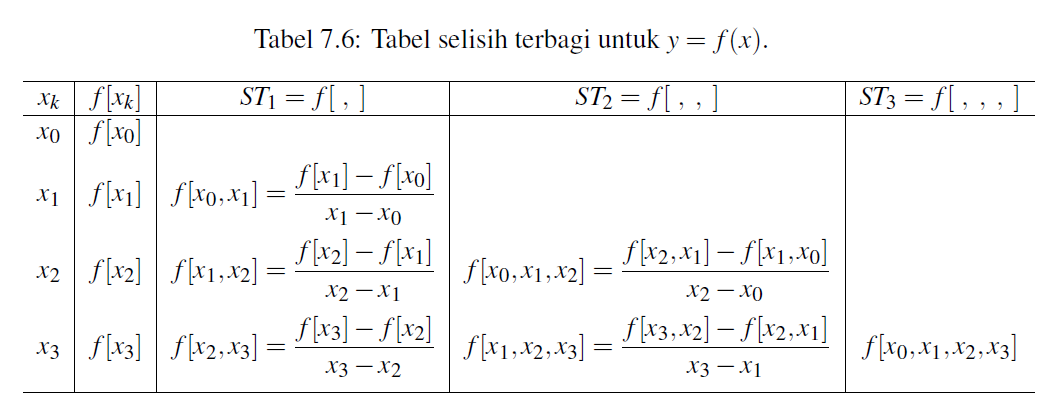

In [ ]:
#= Pseudo-code
%%METODE INTERPOLASI NEWTON
% [y,D] = newton(x,xd,yd)
% Input  : x     -> x dapat berupa titik tunggal, atau kumpulan titik 
%          xd,yd -> Data pasangan terurut (X,Y) 
% Output : y     -> Hasil interpolasi dari titik x 
%          D     -> Tabel beda-terbagi untuk interpolasi Newton
=#

function newton(x, xd, yd)
  #% sedikit trik agar bisa menghitung nilai interpolasi pada banyak 
  #% titik sekaligus. Intinya, tetap diproses satu titik demi titik.
  m=length(x);
  y=zeros(m)
  if m > 1
    for i=1:m
      # proses satu titik demi satu titik
      y[i],D =newton(x[i], xd, yd);
    end
    return y,D
  end   
  #% periksa jumlah titik dan tentukan derajat polinom
  ntitik = length(xd);
  #% hitung tabel beda-terbagi (divided-difference)
  D = zeros(ntitik,ntitik)
  D[:,1]=yd;          #% kolom pertama
  for j=2:ntitik      #% kolom ke-2 dan seterusnya
    for k=j:ntitik
        D[k,j] = (D[k,j-1]-D[k-1,j-1])/(xd[k]-xd[k-j+1]);
    end
  end 
  #% hitung interpolasi Newton
  y = D[1,1]; s = 1;
  for i=2:ntitik
    s = s * (x-xd[i-1]);
    y = y + D[i,i]*s;
  end
  return y, D
end

### Contoh 3
Diketahui $ f(x)=x^3-4x $. 

Susunlah tabel selisih terbagi berdasarkan nilai $ x_0=1,x_1=2,\dots,x_5=6 $ dan carilah polinomial Newton $ P_3(x) $ berdasarkan $ x_0,x_1,x_2, $ dan $ x_3 $.
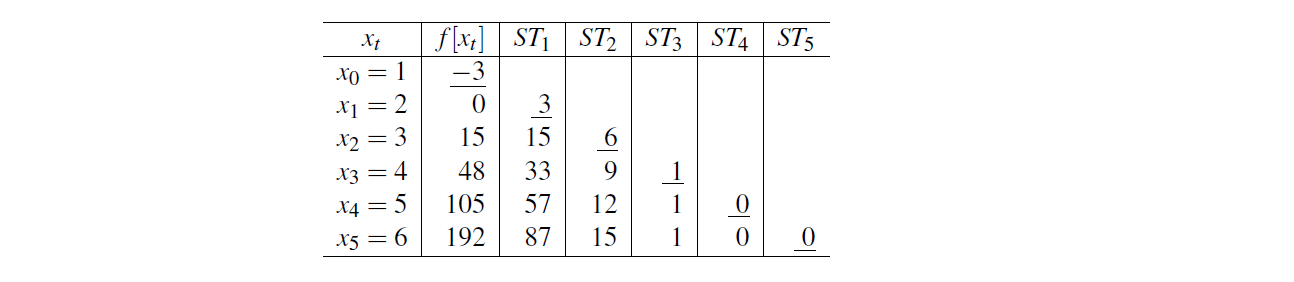
Berdasarkan Tabel di atas, didapatkan nilai koefisien $ a_0=-3,a_1=3,a_2=6 $ dan $ a_3=1 $ untuk $ P_3(x) $ pada diagonal tabel selisih terbagi. 

Jadi, $ P_3(x) $ adalah
$$ P_3(x)=-3+3(x-1)+6(x-1)(x-2)+(x-1)(x-2)(x-3) $$

In [ ]:
f(x) = x.^3-4*x;
	 xd = 1:6;
	 yd = f(xd); 
	 ynew,D = newton(1,xd,yd)
	 D

### Contoh 4
Diberikan fungsi $$  f(x)=\cos(x)  $$ dan empat titik $ (k,f(k)) $ dengan $ k=0,1,2,3 $. Berikut merupakan langkah-langkah  untuk membentuk fungsi interpolasi $ P_1(x) $, $ P_2(x) $, dan $ P_3(x) $ menggunakan metode Newton, serta pembentukan grafik perbandingan fungsi $ f(x) $ dan garis interpolasi pada interval $ [0,3.1] $.

In [ ]:
# Definisikan fungsi f(x) dan urutan titik (xd,yd)
f(x) = cos(x);
xd = 0:3;
yd = f.(xd);
# Definisikan interval grafik, yaitu xnew
x = 0:0.1:3.1;

In [ ]:
# Hitung nilai ynew dengan interpolasi newton, P1(x)
ynew,D = newton(x,xd[1:2],yd[1:2]);
# Perbandingan plot f(x) dan P1(x)
plt1 = plot(x,f.(x),label = "f(x)")
plot!(x,ynew,label = "P1(x)")
scatter!(xd[1:2],yd[1:2],label = :none)

xlabel!("x")
ylabel!("y")

In [ ]:
# Hitung nilai ynew dengan interpolasi newton, P2(x)
ynew,D = newton(x,xd[1:3],yd[1:3]);
# Perbandingan plot f(x) dan P2(x)
plt2 = plot(x,f.(x),label = "f(x)")
plot!(x,ynew,label = "P2(x)")
scatter!(xd[1:3],yd[1:3],label = :none)

xlabel!("x")
ylabel!("y")

In [ ]:
# Hitung nilai ynew dengan interpolasi newton, P3(x)
ynew,D = newton(x,xd[1:4],yd[1:4]);
# Perbandingan plot f(x) dan P3(x)
plt3 = plot(x,f.(x),label = "f(x)")
plot!(x,ynew,label = "P3(x)")
scatter!(xd[1:4],yd[1:4],label = :none)

xlabel!("x")
ylabel!("y")

### Contoh 5 Soal Kuliah (_Polynomial Wiggle_)
Misalkan diberikan suatu fungsi sebagai berikut.

$$ f(x)=\dfrac{1}{1+12x^2}$$

Dengan mengambil titik $(x_d,y_d)$ pada $x_d=-1,-0.8,-0.6,...,0.6,0.8,1$ dan $y_d=f(x_d)$. Hitunglah
 1. Hampiran interpolasi dari $f(x)$ menggunakan data tersebut.
 2. Hampiran interpolasi dari $f(x)$ dengan membagi data menjadi 2 bagian yaitu $[-1,0]$ dan $[0,1]$

Untuk lebih jelasnya, berikut scatter plot dari data yang ditentukan.

In [ ]:
f(x) = 1/(1+12*x^2);
xd = -1:0.2:1;
yd = f.(xd);
x = -1:0.01:1
scatter(xd,yd,legend = :false)
#plot!(x,f.(x))

**Langkah 1** Hampiran interpolasi dari $f(x)$ menggunakan data pada selang $[-1,1]$ secara langsung.

In [ ]:
f(x) = 1/(1+12*x^2);
xd = -1:0.2:1;
yd = f.(xd);
x = -1:.01:1;
ynew = newton(x,xd,yd);

plt = plot(x,f.(x),label = "f(x)")
plot!(x,ynew,label = "P10(x)")
scatter!(xd,yd,label = :none)

xlabel!("x")
ylabel!("y") 

Terjadi ketidaksesuaian yang amat tinggi pada titik mendekati $x=-1$ dan $x=1$. Ketidaksesuaian itu sering disebut sebagai goncangan polinomial (_polynomial wiggle_). Hal ini terjadi karena proses interpolasi melibatkan fungsi polinomial berderajat terlalu tinggi. Sebagai alternatifnya, derajat fungsi polinomial dapat dipangkas dengan cara mempartisi selang awal menjadi dua atau lebih selang bagian (sub-interval).

**Langkah 2** Hampiran interpolasi dari $f(x)$ dengan membagi data menjadi 2 bagian yaitu $[-1,0]$ dan $[0,1]$

In [ ]:
f(x) = 1/(1+12*x^2);
xd = -1:0.2:0;
yd = f.(xd);
x = -1:.01:0;
ynew = newton(x,xd,yd);

plt = plot(x,f.(x),color = :red,label = "f(x)")
plot!(x,ynew,color = :blue,label = "P5(x)")
scatter!(xd,yd,color = :red,label = :none)

xd = 0:0.2:1;
yd = f.(xd);
x = 0:.01:1;
ynew = newton(x,xd,yd);

plot!(x,f.(x),color = :red,label = :none)
plot!(x,ynew,color = :blue,label = :none)
scatter!(xd,yd,color = :red,label = :none)

xlabel!("x")
ylabel!("y") 

Hasil interpolasi menggunakan cara kedua jauh lebih akurat daripada menggunakan cara yang pertama


<hr style="border:2px solid black"> </hr>

# Soal Latihan
Kerjakan soal berikut pada saat kegiatan praktikum berlangsung.

`Nama: ________`

`NIM: ________`

### Soal 1
Diberikan fungsi $ f(x)=\sin(x) $.

Ulangi langkah-langkah pada **Contoh 2** untuk membentuk hampiran $ P_2(x) $ dan $ P_3(x) $ pada interval $ [0,1.2] $ kemudian hitung galat masing-masing hampiran tersebut.

### Soal 2
Diberikan fungsi $ f(x)=\sin(x) $.
Ulangi **Contoh 4** untuk membentuk hampiran $ P_1(x) $, $ P_2(x) $ dan $ P_3(x) $ dengan titik $ (k,f(k)) $ dimana $ k=0,1,2,3 $ lalu gambarkan masing-masing grafik hampiran Newton dan fungsi $ f(x) $ pada interval $ [0,3.1] $.

### Soal 3
Misalkan diberikan suatu fungsi sebagai berikut.

$$ f(x)=e^{-\sin(x)} $$

Dengan mengambil titik $(x_d,y_d)$ pada $x_d=-2,-1,0,1,2,3,4$ dan $y_d=f(x_d)$. Hitunglah
1. Hampiran interpolasi dari $f(x)$ menggunakan data tersebut.
2. Hampiran interpolasi dari $f(x)$ dengan membagi data menjadi 2 bagian yaitu $[-2,1]$ dan $[1,4]$
